In [121]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import math
%matplotlib inline

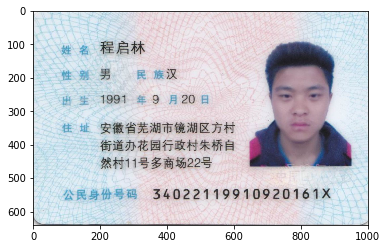

In [122]:
# img_s=cv2.imread("img/IDCard001.png")
# img_s=cv2.imread("img/IDCard002.jpg")
# img_s=cv2.imread("img/IDCard003.jpg")
# img_s=cv2.imread("img/IDCard004.jpg")
# img_s=cv2.imread("img/IDCard005.jpg")
img_s=cv2.imread("img/IDCard006.jpg")
img_s=cv2.cvtColor(img_s, cv2.COLOR_BGR2RGB)
plt.imshow(img_s)

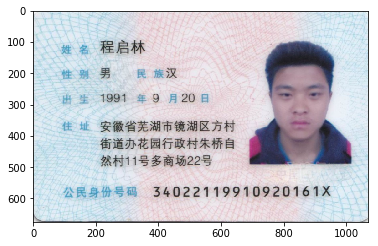

In [123]:
img_rs=cv2.resize(img_s,(214*5, 135*5),interpolation=cv2.INTER_AREA )
plt.imshow(img_rs)

In [124]:
# img_hsv=cv2.cvtColor(img_rs,cv2.COLOR_RGB2HSV)

In [125]:
# img_hsv[:,:,2]+=50

In [126]:
# img_rgb=cv2.cvtColor(img_hsv,cv2.COLOR_HSV2RGB)

In [127]:
# plt.imshow(img_rgb)

In [128]:
region=img_rs[400:550,50:180]

In [129]:
def cal_avg_brightness(img):
    img_c=img*[0.3,0.59,0.11]
    avg=img_c.sum(axis=2).mean()
    return math.ceil(avg)

In [130]:
std_brightness=200

In [131]:
dev=std_brightness-cal_avg_brightness(region)
print(dev)

-22


In [132]:
def adjust_brightness(img,dev):
    r_dev=math.ceil(0.3*dev)
    g_dev=math.ceil(0.59*dev)
    b_dev=math.ceil(0.11*dev)
    res = np.uint8(np.clip((1.0 * img_rs + [r_dev,g_dev,b_dev]), 0, 255))
    return res

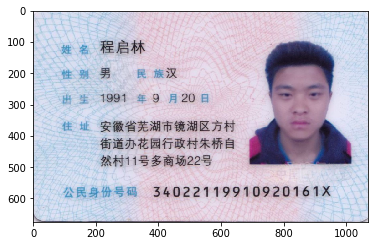

In [133]:
img_ab=adjust_brightness(img_rs,dev)
plt.imshow(img_ab)

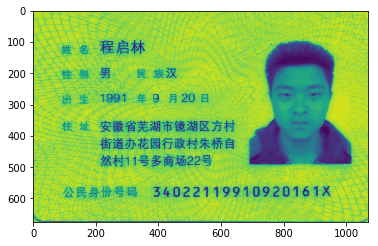

In [134]:
img_g=cv2.cvtColor(img_ab,cv2.COLOR_RGB2GRAY)
plt.imshow(img_g)

In [135]:
###########识别图片文本信息信息
def text_recognize(gray,top,bottom,left,right,bin_threshold=90,lang="eng",config=""):
    gray_copy=gray.copy()
    region=gray_copy[top:bottom,left:right]
    cv2.normalize(region,region, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    ret,region_bin=cv2.threshold(region,bin_threshold,255,cv2.THRESH_BINARY)
    plt.imshow(region_bin)
    code = pytesseract.image_to_string(region_bin,lang,config)
    return code.replace("\n","").strip()

'程 白 林'

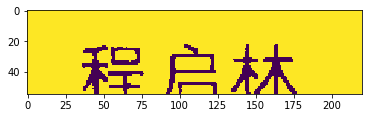

In [136]:
card_name=text_recognize(img_g,75,130,180,400,lang="chi_sim")
card_name

'瞿'

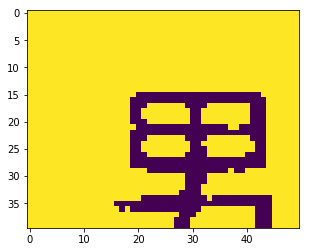

In [137]:
card_sex=text_recognize(img_g,170,210,200,250,lang="chi_sim",config="-psm 10")
card_sex

'刃'

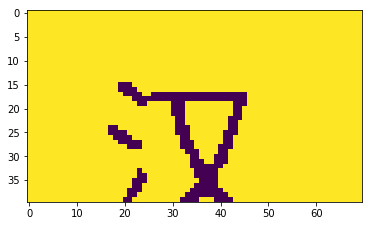

In [138]:
card_nation=text_recognize(img_g,170,210,410,480,lang="chi_sim",config="-psm 8")
card_nation

'34022119910920161X'

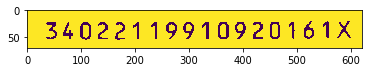

In [139]:
card_id=text_recognize(img_g,540,610,350,970,config="-psm 8")
card_id

'安徽省芜湖市镜湖区方村街道办花园行政村朱桥自'

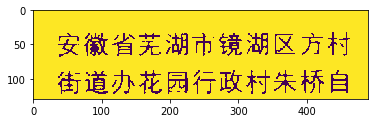

In [140]:
card_addr=text_recognize(img_g,320,450,180,670,lang="chi_sim")
card_addr

'1991.'

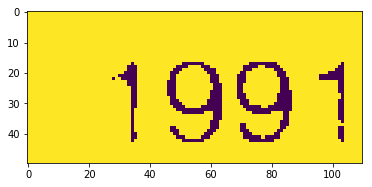

In [141]:
card_year=text_recognize(img_g,250,300,190,300,config="-psm 8")
card_year

'9'

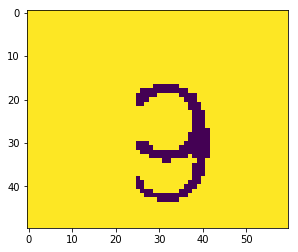

In [142]:
card_month=text_recognize(img_g,250,300,360,420,config="-psm 8")
card_month

'20'

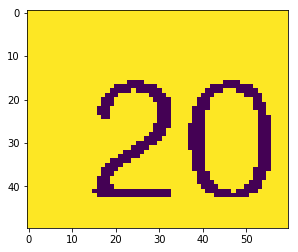

In [143]:
card_day=text_recognize(img_g,250,300,460,520,config="-psm 8")
card_day

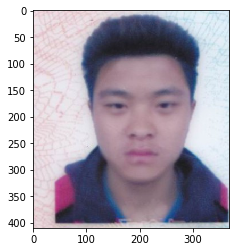

In [144]:
card_photo=img_rs[90:500,650:1020]
plt.imshow(card_photo)

In [145]:
print("姓名："+card_name)
print("性别："+card_sex)
print("民族："+card_nation)
print("出生日期："+card_year+"年"+card_month+"月"+card_day+"日")
print("地址："+card_addr)
print("证件号码："+card_id)

姓名：程 白 林
性别：瞿
民族：刃
出生日期：1991.年9月20日
地址：安徽省芜湖市镜湖区方村街道办花园行政村朱桥自
证件号码：34022119910920161X
